1. Import Libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pickle
import matplotlib.pyplot as plt
import joblib

2. Load the Trained Model

In [18]:
# Load the trained model

# Load SVM model
svm_model = joblib.load('../models/saved_models/svm_model.joblib')

# Load Naive Bayes model
nb_model = joblib.load('../models/saved_models/nb_model.joblib')

#Random Forest Classifier
rf_model = joblib.load('../models/saved_models/rf_model.joblib')

# Load the Linear Regression Model
lr_model = joblib.load('../models/saved_models/lr_model.joblib')

3. Load the Test Data

In [19]:
# Load the preprocessed test data
data = pd.read_csv("../data/processed/spam_processed.csv")

# Separate features and target
x = data.drop(columns=["Label_num"])
y = data["Label_num"]

#Split into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

4. Make Predictions

In [20]:
svm_predictions = svm_model.predict(x)
nb_predictions = nb_model.predict(x)
rf_predictions = rf_model.predict(x)
lr_predictions = lr_model.predict(x)


5. Evaluate Models

In [21]:
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))


In [22]:
print("Evaluation for SVM Model:")
evaluate_model(y, svm_predictions)


Evaluation for SVM Model:
Accuracy: 0.9893348846228427
Precision: 0.9867109634551495
Recall: 0.9266770670826833
F1 Score: 0.9557522123893806

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4516
           1       0.99      0.93      0.96       641

    accuracy                           0.99      5157
   macro avg       0.99      0.96      0.97      5157
weighted avg       0.99      0.99      0.99      5157



In [23]:
print("Evaluation for Naive Bayes Model:")
evaluate_model(y, nb_predictions)


Evaluation for Naive Bayes Model:
Accuracy: 0.9780880356796587
Precision: 0.9962406015037594
Recall: 0.8268330733229329
F1 Score: 0.9036658141517476

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4516
           1       1.00      0.83      0.90       641

    accuracy                           0.98      5157
   macro avg       0.99      0.91      0.95      5157
weighted avg       0.98      0.98      0.98      5157



In [24]:
print("Evaluation for Random Forest Model:")
evaluate_model(y, rf_predictions)


Evaluation for Random Forest Model:
Accuracy: 0.995346131471786
Precision: 0.9920255183413078
Recall: 0.9703588143525741
F1 Score: 0.9810725552050473

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4516
           1       0.99      0.97      0.98       641

    accuracy                           1.00      5157
   macro avg       0.99      0.98      0.99      5157
weighted avg       1.00      1.00      1.00      5157



In [25]:
print("Evaluation for Linear Regression Model:")
evaluate_model(y, lr_predictions)

Evaluation for Linear Regression Model:
Accuracy: 0.9621873182082606
Precision: 0.9911894273127754
Recall: 0.7020280811232449
F1 Score: 0.821917808219178

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4516
           1       0.99      0.70      0.82       641

    accuracy                           0.96      5157
   macro avg       0.98      0.85      0.90      5157
weighted avg       0.96      0.96      0.96      5157



In [26]:
results = {
    'Model': ['SVM', 'Naive Bayes', 'Random Forest', 'Linear Regression'],
    'Accuracy': [
        accuracy_score(y, svm_predictions),
        accuracy_score(y, nb_predictions),
        accuracy_score(y, rf_predictions),
        accuracy_score(y, lr_predictions)
        
    ],
    'Precision': [
        precision_score(y, svm_predictions),
        precision_score(y, nb_predictions),
        precision_score(y, rf_predictions),
        precision_score(y, lr_predictions)
    ],
    'Recall': [
        recall_score(y, svm_predictions),
        recall_score(y, nb_predictions),
        recall_score(y, rf_predictions),
        recall_score(y, lr_predictions)
    ],
    'F1 Score': [
        f1_score(y, svm_predictions),
        f1_score(y, nb_predictions),
        f1_score(y, rf_predictions),
        f1_score(y, lr_predictions)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model  Accuracy  Precision    Recall  F1 Score
0                SVM  0.989335   0.986711  0.926677  0.955752
1        Naive Bayes  0.978088   0.996241  0.826833  0.903666
2      Random Forest  0.995346   0.992026  0.970359  0.981073
3  Linear Regression  0.962187   0.991189  0.702028  0.821918


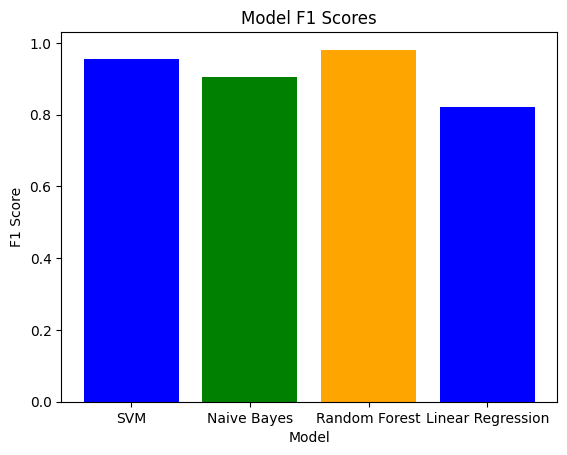

In [27]:

# Plot F1 Scores
plt.bar(results['Model'], results['F1 Score'], color=['blue', 'green', 'orange'])
plt.title('Model F1 Scores')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.show()
